# Volcanos and ENSO

* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import geoxarray
from geoplots import mapplot
import xlearn
from climindex import get_climate_index
from geoplots import xticksmonth

!date
%matplotlib notebook

Tue Mar 27 16:22:39 EDT 2018


In [3]:
nino = xr.DataArray.from_series(get_climate_index('nino34')) \
    .rename({'index': 'time'}) \
    .resample(time='MS').mean('time')

<IPython.core.display.Javascript object>


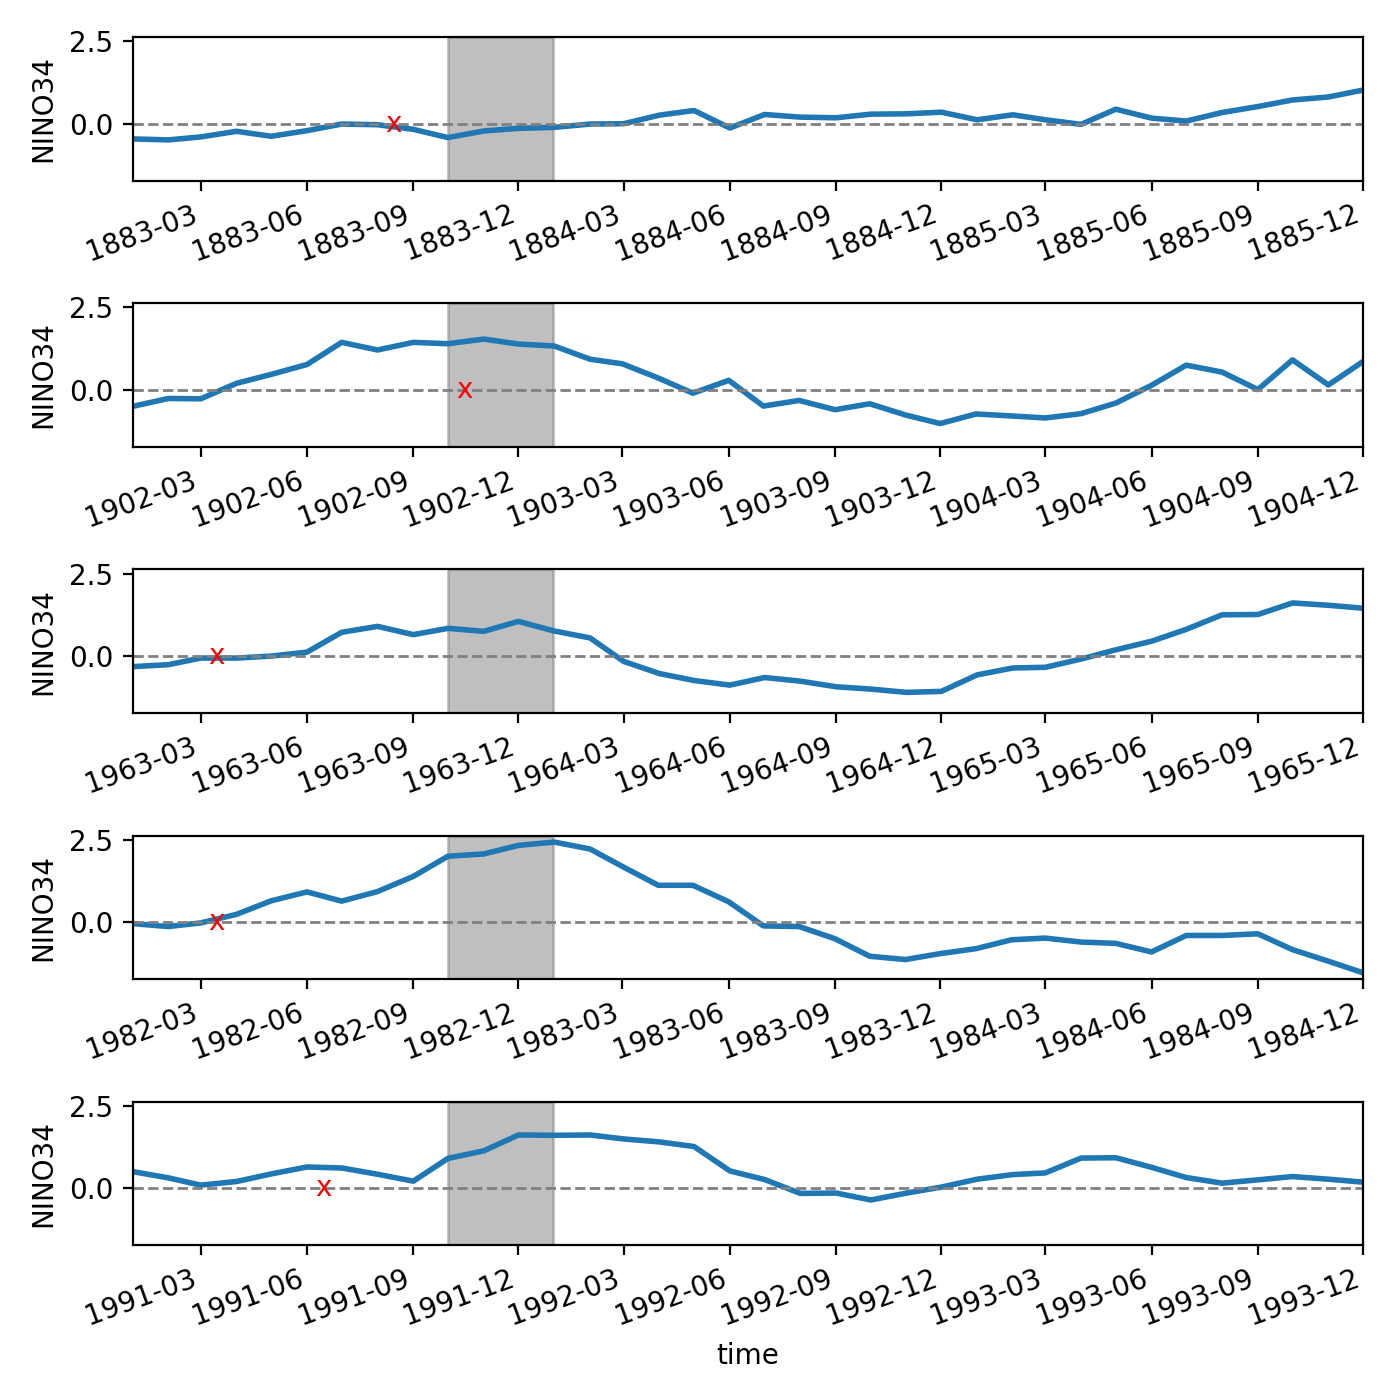

In [4]:
fig, axes = plt.subplots(5, 1, sharey=True, figsize=(7,7))
monthticks = range(3,13,3)
years = (1883,1902, 1963, 1982, 1991)
months = ('08', '10', '03', '03', '06')

for ax, year, month in zip(axes, years, months):
    plt.sca(ax)
    nino.sel(time=slice(f'{year}', f'{year+2}')).plot(ax=ax)
    xticksmonth(monthticks, ax=ax)
    ax.axhline(0, color='gray', ls='--', lw=1)
    ax.axvspan(f'{year}-10-01', f'{year}-12-31', color='gray', alpha=.5)
    plt.xlim((datetime.datetime(year,1,1), datetime.datetime(year+2,12,1)))
    ax.text(f'{year}-{month}-15', 0, 'x', color='r', va='center', ha='center')
    

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=20, ha='right')
plt.tight_layout()